**NAMA               : MUHAMMAD NAFISH ZALDINANDA**

No. Registrasi : 1494037162101-1859

Program             : Fresh Graduate Academy Digital Talent Scholarship 2022 | Machine Learning Developer

Modul :  Membuat Model NLP dengan TensorFlow



---

Proyek Akhir Membuat Model NLP dengan TensorFlow :


1.   Dataset yang dipakai sebagai berikut : https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots
1.   Dataset harus dibagi menjadi train set dan Validation set sebesar 20% dari total dataset.
3.   Harus menggunakan fungsi tokenizer.
4.   Harus menggunakan LSTM dalam arsitektur model.
5.   Model harus menggunakan model sequential
6.   Harus menggunakan Embedding.
7.   Program dikerjakan pada Google Colaboratory
8.   Akurasi dari model minimal 75% pada train set dan validation set.





In [1]:
#Library yang Digunakan pada Model Text Classication
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import sys
import os
import string
import unicodedata
import nltk
%matplotlib inline
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Mengimport Dataset dari Direktori Google Drive Pribadi
df = pd.read_csv("/content/drive/My Drive/dataset/wiki_movie_plots_deduped.csv")
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
#Menghapus Kolom Fitur yang Tidak digunakan dalam Proses Pengklasifikasian
df = df.drop(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis=1)
df

,Genre,Plot
0,unknown,"A bartender is working at a saloon, serving dr..."
1,unknown,"The moon, painted with a smiling face hangs ov..."
2,unknown,"The film, just over a minute long, is composed..."
3,unknown,Lasting just 61 seconds and consisting of two ...
4,unknown,The earliest known adaptation of the classic f...
...,...,...
34881,unknown,"The film begins in 1919, just after World War ..."
34882,comedy,"Two musicians, Salih and Gürkan, described the..."
34883,comedy,"Zafer, a sailor living with his mother Döndü i..."
34884,romantic comedy,The film centres around a young woman named Am...


In [5]:
#Jumlah Persebaran Dataset pada Kolom Target Genre
#Terdapat 2265 Jenis Genre Movie Pada Dataset
df['Genre'].value_counts()

unknown                          6083
drama                            5964
comedy                           4379
horror                           1167
action                           1098
                                 ... 
cbc-tv miniseries                   1
bio-drama                           1
national film board docudrama       1
cult drama                          1
horror romantic comedy              1
Name: Genre, Length: 2265, dtype: int64

In [6]:
#Dengan Menggunakan fungsi .isin() Memfilter 4 Genre Movie dalam Pengklasifikasian 
df_new = df[df["Genre"].isin(['horror','western', 'musical', 'war'])]
df_new

,Genre,Plot
6,western,The film opens with two bandits breaking into ...
21,western,The film opens in a town on the Mexican border...
44,horror,White-haired Dr. Jekyll has secretly locked hi...
55,horror,Dr. Henry Jekyll (King Baggot) sends a note to...
97,western,Esra Kincaid (La Reno) takes land by force and...
...,...,...
34342,horror,The spirit of Bo-yeong is unable to ascend to ...
34490,war,"In Korea, AD 668. Kim Beob-min (Hwang Jung-min..."
34510,horror,"So-yeon works as a groomer in a pet shop, but ..."
34840,horror,A group of friends gather to attend a wedding ...


In [7]:
#Mereset Index Dataframe
df_new.reset_index(inplace=True, drop=True)
df_new

,Genre,Plot
0,western,The film opens with two bandits breaking into ...
1,western,The film opens in a town on the Mexican border...
2,horror,White-haired Dr. Jekyll has secretly locked hi...
3,horror,Dr. Henry Jekyll (King Baggot) sends a note to...
4,western,Esra Kincaid (La Reno) takes land by force and...
...,...,...
2767,horror,The spirit of Bo-yeong is unable to ascend to ...
2768,war,"In Korea, AD 668. Kim Beob-min (Hwang Jung-min..."
2769,horror,"So-yeon works as a groomer in a pet shop, but ..."
2770,horror,A group of friends gather to attend a wedding ...


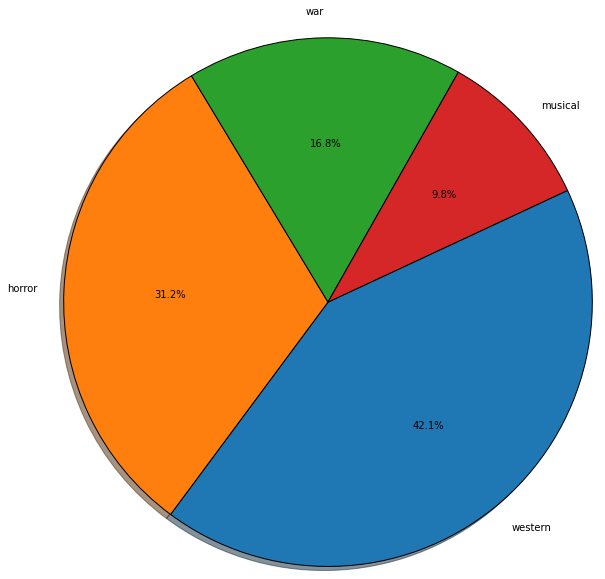

In [8]:
#Membuat Plot Persebaran Persentase dari 4 Genre Movie yang Digunakan pada Model Klasifikasi
columns_Genre_type = df_new['Genre'].unique().tolist()

plt.rcParams["figure.figsize"] = (12,8)

plt.pie(df_new['Genre'].value_counts(), autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'}, counterclock = False, shadow = True, startangle = 25, 
        radius = 1.3, labels = columns_Genre_type)
plt.tight_layout()

In [9]:
#Library yang digunakan dalam proses stopword
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from string import punctuation

In [10]:
#Beberapa fungsi yang digunakan untuk pre-processing data text
def remove_bracket(text):
  return re.sub('\[[^]]*\]', '', text)

def remove_special_characters(text, remove_digits=True):
  pattern = r'[^a-zA-z0-9\s]'
  text=re.sub(pattern, '', text)
  return text

nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
           final_text.append(i.strip().lower())
    return " ".join(final_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Implementasi dari Pre-Processing Data Text
def clean_text(text):
  text = remove_bracket(text)
  text = remove_special_characters(text, remove_digits = True)
  text = remove_stopwords(text)
  return text

df_new['Plot'] = df_new['Plot'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
df_new.head()

,Genre,Plot
0,western,film opens two bandits breaking railroad teleg...
1,western,film opens town mexican border poker game goin...
2,horror,whitehaired dr jekyll secretly locked laborato...
3,horror,dr henry jekyll king baggot sends note fiance ...
4,western,esra kincaid la reno takes land force taken es...


In [13]:
#One Hot-Encoding untuk Membuat Label pada Kolom Target (Genre)
kategori = pd.get_dummies(df_new.Genre)
df_encod = pd.concat([df_new, kategori], axis = 1)
df_encod = df_encod.drop(columns = 'Genre')
df_encod.head()

,Plot,horror,musical,war,western
0,film opens two bandits breaking railroad teleg...,0,0,0,1
1,film opens town mexican border poker game goin...,0,0,0,1
2,whitehaired dr jekyll secretly locked laborato...,1,0,0,0
3,dr henry jekyll king baggot sends note fiance ...,1,0,0,0
4,esra kincaid la reno takes land force taken es...,0,0,0,1


In [14]:
#Mengkonversi Nilai pada Dataframe menjadi Nilai Numpy Array dengan Fungsi .values
plot = df_encod['Plot'].astype(str)
Target = df_encod[['horror','western', 'musical', 'war']].values

In [15]:
#Membagi Dataset Menjadi Data Training (80%) dan Data Testing (20%)
from sklearn.model_selection import train_test_split
plot_train, plot_test, Target_train, Target_test = train_test_split(plot, Target, test_size = 0.2, shuffle = True)

In [16]:
#Proses Tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words = 5000, oov_token='x')
tokenizer.fit_on_texts(plot_train) 
#tokenizer.fit_on_texts(plot_test)
 
sekuens_latih = tokenizer.texts_to_sequences(plot_train)
sekuens_test = tokenizer.texts_to_sequences(plot_test)
 
#Proses Padding
padded_latih = pad_sequences(sekuens_latih, padding = 'post', maxlen = 48, truncating = 'post') 
padded_test = pad_sequences(sekuens_test, padding = 'post', maxlen = 48, truncating = 'post')

In [17]:
#Pembuatan Model Text Classification Multiclass

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 38000, output_dim = 16), #Proses Embedding
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

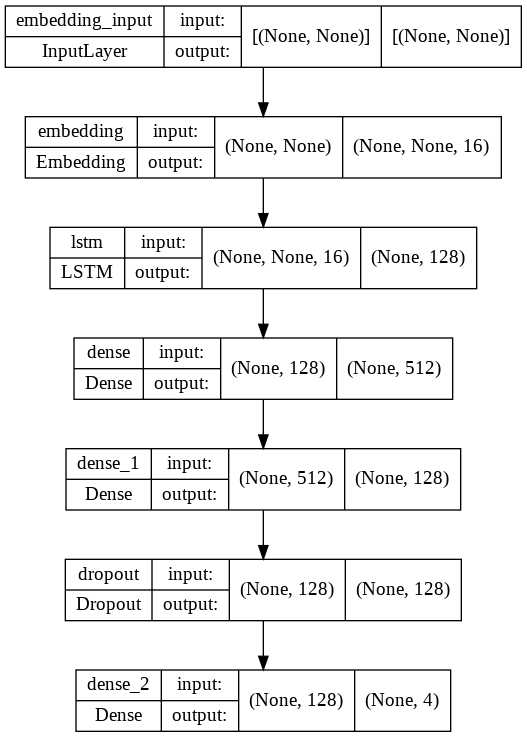

In [18]:
#Plot Arsitektur dari Model yang Telah Dibuat
tf.keras.utils.plot_model(model, show_shapes = True)

In [19]:
#Model Compile
model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [20]:
#Menggunakan Fungsi Callback untuk Batasan pada Saat Pelatihan Model
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.82): #Pelatihan Model akan Berhenti ketika accuracy > 0.90 dan val_accuracy > 0.82
      self.model.stop_training = True
      
stopTraining = Callback()

In [21]:
#Pelatihan Model
num_epochs = 50
history = model.fit(padded_latih, Target_train, epochs = num_epochs, 
                    validation_data=(padded_test, Target_test), verbose = 2, callbacks = [stopTraining])

Epoch 1/50
70/70 - 14s - loss: 1.2715 - accuracy: 0.4263 - val_loss: 1.2179 - val_accuracy: 0.4577 - 14s/epoch - 199ms/step
Epoch 2/50
70/70 - 4s - loss: 0.8522 - accuracy: 0.6698 - val_loss: 0.6433 - val_accuracy: 0.6901 - 4s/epoch - 60ms/step
Epoch 3/50
70/70 - 4s - loss: 0.5380 - accuracy: 0.7483 - val_loss: 0.6607 - val_accuracy: 0.7369 - 4s/epoch - 59ms/step
Epoch 4/50
70/70 - 4s - loss: 0.3767 - accuracy: 0.8484 - val_loss: 0.6959 - val_accuracy: 0.7676 - 4s/epoch - 59ms/step
Epoch 5/50
70/70 - 4s - loss: 0.2266 - accuracy: 0.9197 - val_loss: 0.8567 - val_accuracy: 0.7820 - 4s/epoch - 59ms/step
Epoch 6/50
70/70 - 4s - loss: 0.1814 - accuracy: 0.9427 - val_loss: 0.9850 - val_accuracy: 0.7712 - 4s/epoch - 60ms/step
Epoch 7/50
70/70 - 4s - loss: 0.1395 - accuracy: 0.9562 - val_loss: 1.0127 - val_accuracy: 0.7586 - 4s/epoch - 59ms/step
Epoch 8/50
70/70 - 4s - loss: 0.0931 - accuracy: 0.9675 - val_loss: 1.2263 - val_accuracy: 0.8162 - 4s/epoch - 59ms/step
Epoch 9/50
70/70 - 4s - loss:

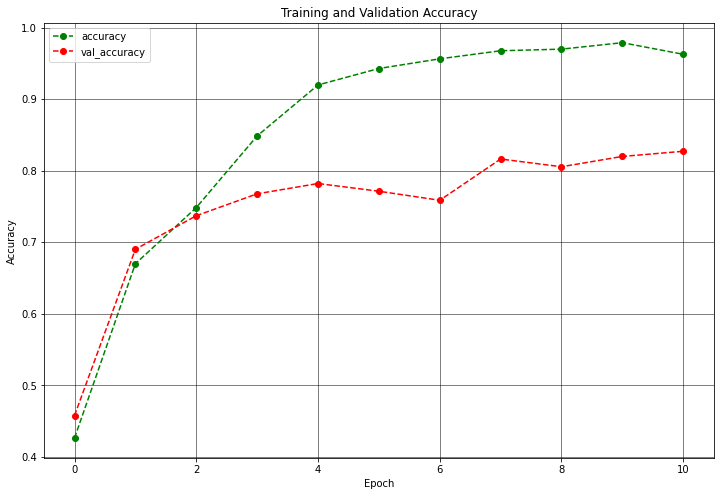

In [22]:
#Visualisasi Training dan Validation Accuracy pada Setiap Epoch
plt.figure(figsize = (12,8))
plt.title("Training and Validation Accuracy")
plt.plot(history.history['accuracy'],'go--')
plt.plot(history.history['val_accuracy'],'ro--')
plt.legend(['accuracy','val_accuracy'])
plt.grid(color ='k', linewidth = 0.5)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

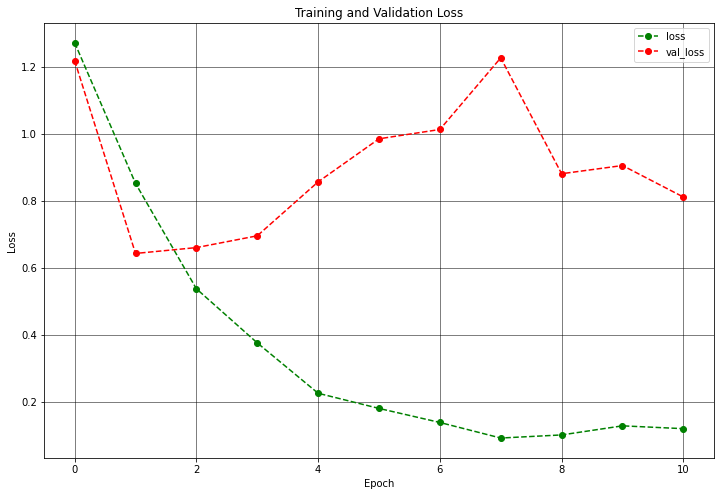

In [23]:
#Visualisasi Training dan Validation Loss pada Setiap Epoch
plt.figure(figsize = (12,8))
plt.title("Training and Validation Loss")
plt.plot(history.history['loss'],'go--')
plt.plot(history.history['val_loss'],'ro--')
plt.legend(['loss','val_loss'])
plt.grid(color ='k', linewidth =0.5)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()